"01_palm": An open palm hand gesture.

"02_l": A hand gesture resembling the letter "L."

"03_fist": A closed fist hand gesture.

"04_fist_moved": A closed fist with movement.

"05_thumb": A thumb-up hand gesture.

"06_index": An extended index finger hand gesture.

"07_ok": An "OK" hand gesture formed with thumb and index finger.

"08_palm_moved": An open palm hand gesture with movement.

"09_c": A hand gesture resembling the letter "C."

"10_down": A downward-pointing hand gesture.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import random
import keras
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split

CATEGORIES = ["01_palm", '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']
IMG_SIZE = 50

# Define the hand movement function
def hand_movement_function(prev_img_arr, current_img_arr):
    # Calculate the difference between previous and current frames (simple approach)
    difference = current_img_arr - prev_img_arr
    
    # Calculate movement intensity as the sum of pixel differences
    movement_intensity = np.sum(np.abs(difference))
    
    return movement_intensity

def extract_hand_position(image_path):
    img_arr = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    resized_img = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
    normalized_img = resized_img / 255.0
    return normalized_img

data_path = "C:/Users/USER/GESTURE RECOGNITION/leapGestRecog/leapGestRecog"
image_data = []
prev_img_arr = None  # Initialize the previous image array

In [2]:
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_path = os.path.join(path, img)
                img_arr = extract_hand_position(img_path)
                
                if prev_img_arr is not None:
                    # Call the hand movement function to analyze hand movement
                    movement_intensity = hand_movement_function(prev_img_arr, img_arr)
                else:
                    movement_intensity = 0  # No previous image available
                    
                image_data.append([img_arr, class_index, movement_intensity])
                
                prev_img_arr = img_arr  # Update the previous image array
            except Exception as e:
                pass

In [3]:
input_data = []
label = []
movement_intensity_data = []  # To store movement intensities

for img_arr, class_index, movement_intensity in image_data:
    input_data.append(img_arr)
    label.append(class_index)
    movement_intensity_data.append(movement_intensity)

input_data = np.array(input_data)
label = np.array(label)
movement_intensity_data = np.array(movement_intensity_data)

label = keras.utils.to_categorical(label, num_classes=10, dtype='i1')

input_data = input_data.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

X_train, X_test, y_train, y_test, movement_train, movement_test = train_test_split(input_data, label, movement_intensity_data, test_size=0.3, random_state=0)


In [9]:
model = keras.models.Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))

model.add(Conv2D(filters=32, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])
history= model.fit(X_train, y_train, epochs = 7, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/7
438/438 [==============================] - 85s 190ms/step - loss: 0.3572 - accuracy: 0.8844 - val_loss: 0.0085 - val_accuracy: 0.9980
Epoch 2/7
438/438 [==============================] - 70s 160ms/step - loss: 0.0187 - accuracy: 0.9942 - val_loss: 0.0091 - val_accuracy: 0.9967
Epoch 3/7
438/438 [==============================] - 69s 158ms/step - loss: 0.0079 - accuracy: 0.9976 - val_loss: 0.0083 - val_accuracy: 0.9972
Epoch 4/7
438/438 [==============================] - 69s 158ms/step - loss: 0.0094 - accuracy: 0.9977 - val_loss: 0.0012 - val_accuracy: 0.9997
Epoch 5/7
438/438 [==============================] - 73s 166ms/step - loss: 0.0032 - accuracy: 0.9989 - val_loss: 0.0027 - val_accuracy: 0.9993
Epoch 6/7
438/438 [==============================] - 74s 169ms/step - loss: 0.0031 - accuracy: 0.9992 - val_loss: 0.0048 - val_accuracy: 0.9988
Epoch 7/7
438/438 [==============================] - 75s 171ms/step - loss: 0.0016 - accuracy: 0.9994 - val_loss: 7.7774e-04 - val_accur

In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])  # Include accuracy as a metric


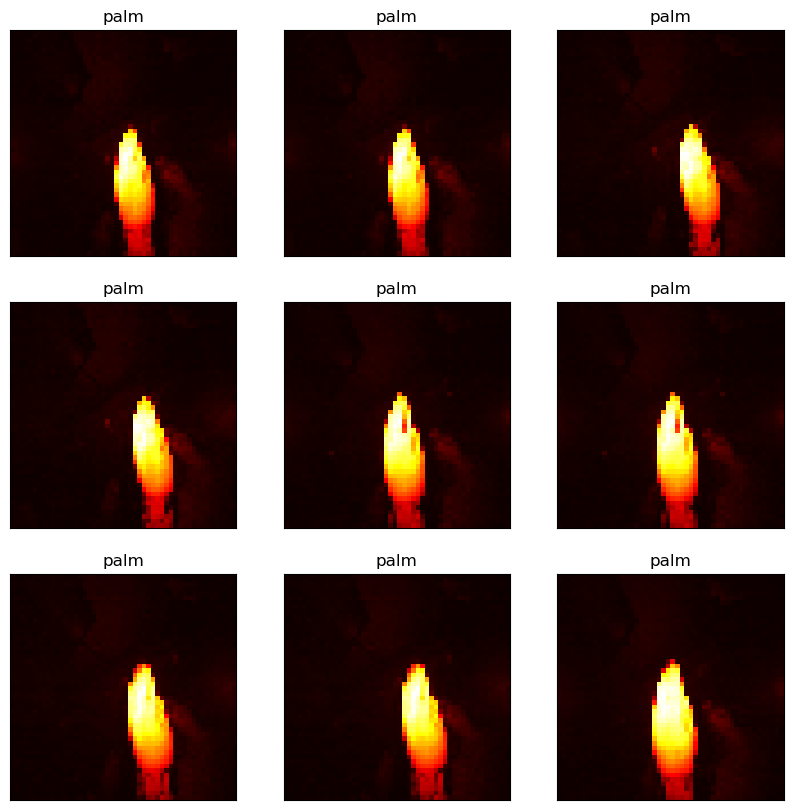

In [10]:
plt.figure(1, figsize=(10,10))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    
    # Extract the class index from the one-hot encoded label
    class_index = np.argmax(label[i])
    
    plt.title(CATEGORIES[class_index][3:])  # Use the class index to access the category name
plt.show()


In [11]:
# Open the webcam
cap = cv2.VideoCapture(0)

prev_img_arr = None  # Initialize the previous image array

while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        break
    
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    resized_frame = cv2.resize(gray_frame, (IMG_SIZE, IMG_SIZE))
    normalized_frame = resized_frame / 255.0
    
    if prev_img_arr is not None:
        movement_intensity = hand_movement_function(prev_img_arr, normalized_frame)
    else:
        movement_intensity = 0
        
    prev_img_arr = normalized_frame
    
    input_data = normalized_frame.reshape(1, IMG_SIZE, IMG_SIZE, 1)
    predicted_class = model.predict(input_data)
    predicted_category = CATEGORIES[np.argmax(predicted_class)]
    
    print(f'Predicted Category: {predicted_category}')
    print(f'Movement Intensity: {movement_intensity}')
    
    cv2.putText(frame, f'Predicted: {predicted_category}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow('Webcam Hand Detection', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 140ms/step
Predicted Category: 02_l
Movement Intensity: 0
1/1 [==============================] - 0s 37ms/step
Predicted Category: 05_thumb
Movement Intensity: 221.72941176470587
1/1 [==============================] - 0s 41ms/step
Predicted Category: 02_l
Movement Intensity: 293.1882352941177
1/1 [==============================] - 0s 38ms/step
Predicted Category: 05_thumb
Movement Intensity: 273.2196078431373
1/1 [==============================] - 0s 35ms/step
Predicted Category: 05_thumb
Movement Intensity: 77.66274509803921
1/1 [==============================] - 0s 39ms/step
Predicted Category: 05_thumb
Movement Intensity: 71.69019607843137
1/1 [==============================] - 0s 47ms/step
Predicted Category: 05_thumb
Movement Intensity: 63.219607843137254
1/1 [==============================] - 0s 72ms/step
Predicted Category: 05_thumb
Movement Intensity: 59.4470588235294
1/1 [==============================] - 0s 51ms/step
Predicted Category

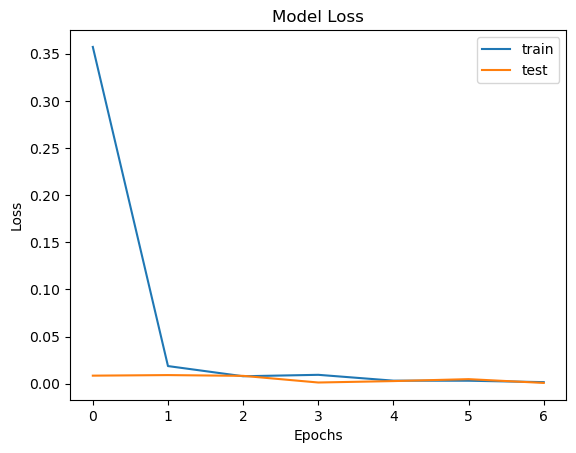

In [12]:
# Now you can plot the loss using the history object
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [17]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


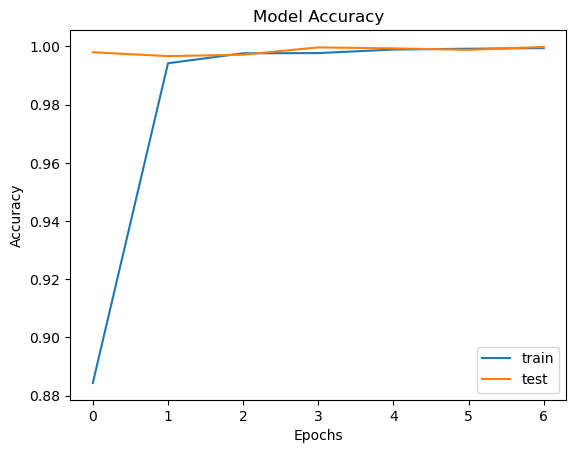

In [18]:
plt.plot(history.history['accuracy'])  # For training accuracy
plt.plot(history.history['val_accuracy'])  # For validation accuracy
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])  # Add legend to differentiate between training and validation
plt.show()

In [19]:
#calculate loss and accuracy on test data

test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

188/188 [==============================] - 8s 39ms/step - loss: 7.7774e-04 - accuracy: 0.9998
Test accuracy: 99.98%


188/188 [==============================] - 9s 49ms/step


[]

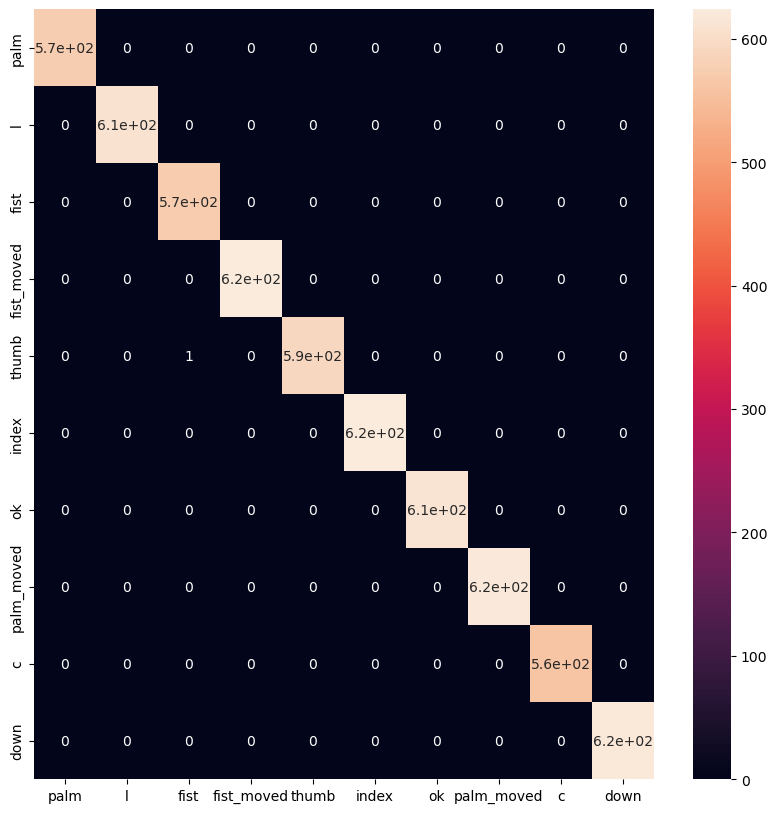

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cat = [c[3:] for c in CATEGORIES]
plt.figure(figsize=(10,10))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
sn.heatmap(cm, annot=True,xticklabels=cat, yticklabels=cat)
plt.plot()